# vector plots to see where offshore water coming from in the summer

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import warnings
import datetime as dt
from pathlib import Path

%matplotlib inline
plt.rcParams['font.size'] = 12
warnings.simplefilter('ignore')

In [2]:
startday = [dt.datetime(2017,6,4)+dt.timedelta(days=i) for i in range(int(17*7))]
folders = [dt.datetime(2017,6,4)+dt.timedelta(days=7*(i+1)) for i in range(int(17))]
folders = np.repeat(folders,7)

path = Path("/ocean/mdunphy/CIOPSW-BC12/")
    # load U
drop_vars = (
        "depthu_bounds", "nav_lat", "nav_lon", 'time_counter_bounds', 'time_instant',
        'time_instant_bounds', 
    )

filesU = [sorted(path.glob("{:%Y%m%d}00/BC12_1d_grid_U_{:%Y%m%d}_{:%Y%m%d}.nc".format(folders[i], startday[i], startday[i]))) for i in range(len(startday))]
   
    # load V
drop_vars = (
        "depthv_bounds", "nav_lat", "nav_lon", 'time_counter_bounds', 'time_instant',
        'time_instant_bounds', 
    )

filesV = [sorted(path.glob("{:%Y%m%d}00/BC12_1d_grid_V_{:%Y%m%d}_{:%Y%m%d}.nc".format(folders[i], startday[i], startday[i]))) for i in range(len(startday))]

In [3]:
xmin = 460
xmax = 680
ymin = 100
ymax = 420

In [4]:
u_mean = xr.open_mfdataset(filesU, drop_variables=drop_vars)['uo'].mean(dim='time_counter')[:,ymin:ymax, xmin:xmax]
v_mean = xr.open_mfdataset(filesV, drop_variables=drop_vars)['vo'].mean(dim='time_counter')[:,ymin:ymax, xmin:xmax]

In [5]:
x = np.arange(xmin,xmax)
y = np.arange(ymin,ymax)
X, Y = np.meshgrid(x,y)

In [6]:
# Load grid
mesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')

In [10]:
# mesh.gdepw_0[0,:,0,0]
dcells = [0, 8, 18, 24, 28,31] # at depths of [0,10,50,100.155,210]

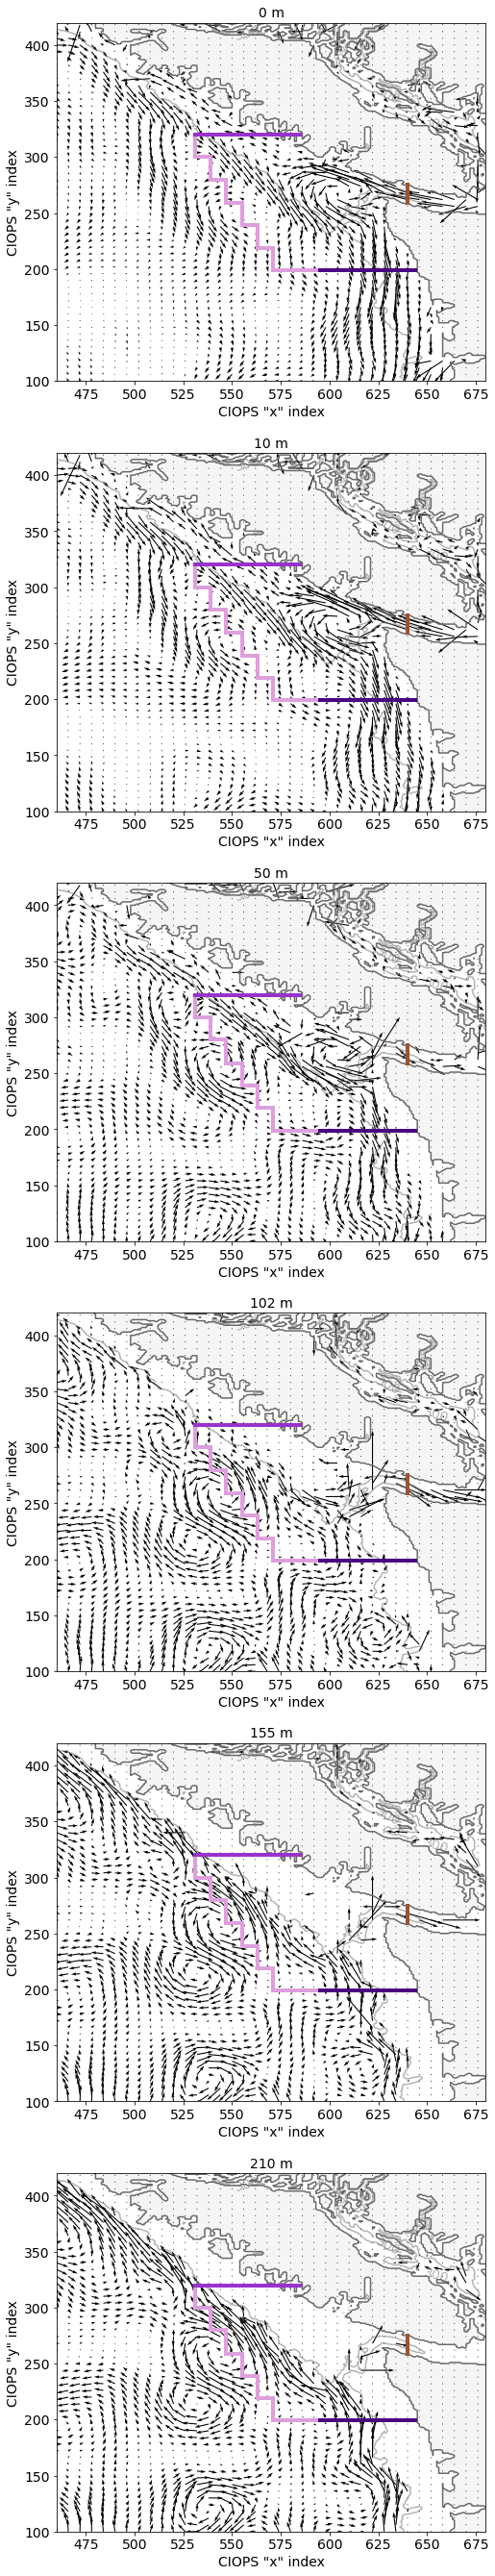

In [16]:
# Increase font size
plt.rcParams['font.size'] = 14

# Make plot area
fig, ax = plt.subplots(len(dcells),1,figsize=(8, 8*len(dcells)))

k = 0
for d in dcells:
    # Overlay domain landmask and coastline
    ax[k].contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
    ax[k].contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='dimgrey')
    ax[k].set_ylim([ymin,ymax])
    ax[k].set_xlim([xmin,xmax])
    ax[k].set_ylabel('CIOPS "y" index')
    ax[k].set_xlabel('CIOPS "x" index')

    c = ax[k].contour(mesh.mbathy[0,:,:]*10, levels=[300],extend='max', colors='dimgrey', alpha=0.5)
    ax[k].clabel(c, inline=1)

    # Add cross-sections
    # outer (saurav):
    ax[k].plot([640,640],[259,275], lw=4, c='sienna', label = "PRT")
    ax[k].plot([531,531],[319,300], 'plum',linewidth=4)#, label='Offshore')
    ax[k].plot([531,539],[300,300], 'plum',linewidth=4)
    ax[k].plot([539,539],[300,280], 'plum',linewidth=4)
    ax[k].plot([539,547],[280,280], 'plum',linewidth=4)
    ax[k].plot([547,547],[280,259], 'plum',linewidth=4)
    ax[k].plot([547,555],[259,259], 'plum',linewidth=4)
    ax[k].plot([555,555],[259,239], 'plum',linewidth=4)
    ax[k].plot([563,555],[239,239], 'plum',linewidth=4)
    ax[k].plot([563,563],[239,219], 'plum',linewidth=4)
    ax[k].plot([563,571],[219,219], 'plum',linewidth=4)
    ax[k].plot([571,571],[219,199], 'plum',linewidth=4)
    ax[k].plot([571,594],[199,199], 'plum',linewidth=4)
    ax[k].plot([531,585],[320,320], 'darkorchid',linewidth=4, label='Shelf Water Boundaries')
    ax[k].plot([595,644],[199,199], 'indigo',linewidth=4)#, label='South (outer)'


    # QUIVER! 
    ax[k].quiver(X[::6,::6],Y[::6,::6],u_mean[int(d),::6,::6],v_mean[int(d),::6,::6])
    title = str(int(mesh.gdepw_0[0,d,0,0]))+" m"
    ax[k].set_title(title, fontsize=14)
    
    k+=1

# what about monthly?

In [10]:
u_mon = xr.open_mfdataset(filesU, drop_variables=drop_vars)['uo'].resample(time_counter="1MS").mean(dim='time_counter')[:,ymin:ymax, xmin:xmax]
v_mon = xr.open_mfdataset(filesV, drop_variables=drop_vars)['vo'].resample(time_counter="1MS").mean(dim='time_counter')[:,ymin:ymax, xmin:xmax]